# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paradip garh
Processing Record 2 of Set 1 | inverloch
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | laredo
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | carbonear
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | jackson
Processing Record 21 of Set 1 | margaret river
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paradip garh,20.3167,86.6167,85.53,52,41,9.35,IN,1713978892
1,inverloch,-38.6333,145.7167,56.30,80,77,16.91,AU,1713978894
2,isangel,-19.5500,169.2667,79.14,89,88,5.95,VU,1713978895
3,laredo,27.5064,-99.5075,80.89,69,100,11.50,US,1713978671
4,thompson,55.7435,-97.8558,41.16,36,20,3.44,CA,1713978854


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paradip garh,20.3167,86.6167,85.53,52,41,9.35,IN,1713978892
1,inverloch,-38.6333,145.7167,56.30,80,77,16.91,AU,1713978894
2,isangel,-19.5500,169.2667,79.14,89,88,5.95,VU,1713978895
3,laredo,27.5064,-99.5075,80.89,69,100,11.50,US,1713978671
4,thompson,55.7435,-97.8558,41.16,36,20,3.44,CA,1713978854


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

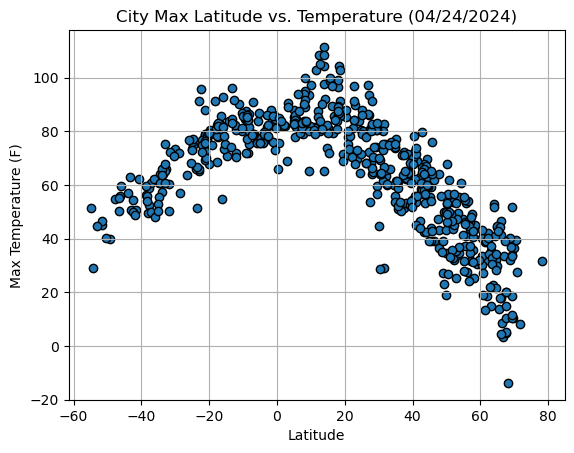

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lat, max_temp, edgecolor="black")

# Incorporate the other graph properties
plt.title ("City Max Latitude vs. Temperature (04/24/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

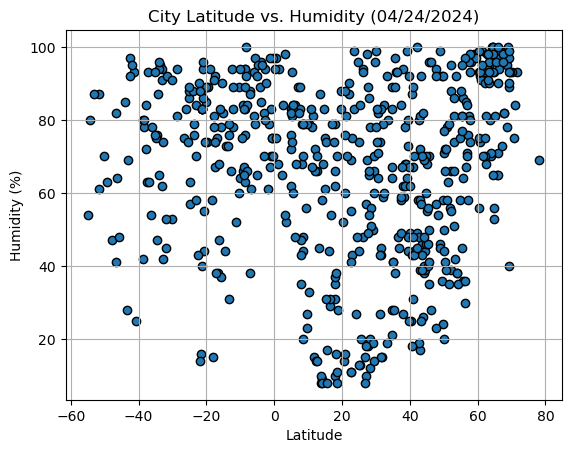

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, humidity, edgecolor="black")

# Incorporate the other graph properties
plt.title ("City Latitude vs. Humidity (04/24/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

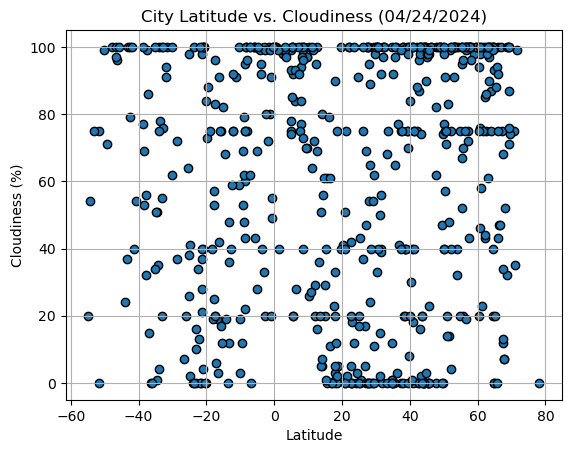

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, cloudiness, edgecolor="black")

# Incorporate the other graph properties
plt.title ("City Latitude vs. Cloudiness (04/24/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

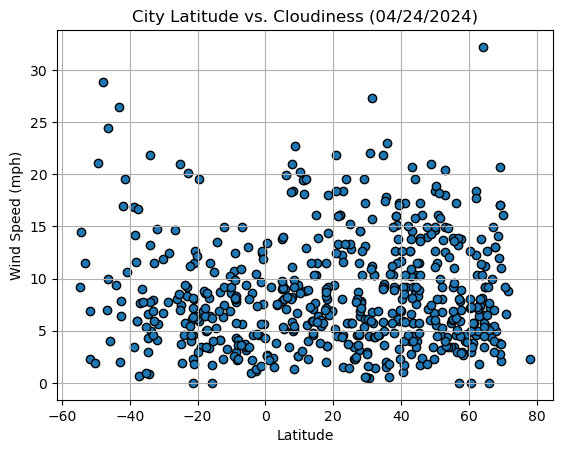

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat, wind_speed, edgecolor="black")

# Incorporate the other graph properties
plt.title ("City Latitude vs. Cloudiness (04/24/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel='X', ylabel='Y', title='Linear Regression', show_eq=True):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, regression_line, color='red', label='Regression Line')
    if show_eq:
        eq_text = f'y = {slope:.2f}x + {intercept:.2f}'
        plt.text(min(x), max(y), eq_text, fontsize=12,color="red", verticalalignment='center')
    print(f"The r-squared is: {r_value}")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paradip garh,20.3167,86.6167,85.53,52,41,9.35,IN,1713978892
3,laredo,27.5064,-99.5075,80.89,69,100,11.50,US,1713978671
4,thompson,55.7435,-97.8558,41.16,36,20,3.44,CA,1713978854
5,klyuchi,52.2667,79.1667,31.96,39,4,13.71,RU,1713978895
7,bethel,41.3712,-73.4140,68.90,44,75,9.22,US,1713978895


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,inverloch,-38.6333,145.7167,56.30,80,77,16.91,AU,1713978894
2,isangel,-19.5500,169.2667,79.14,89,88,5.95,VU,1713978895
6,invercargill,-46.4000,168.3500,56.01,64,96,10.00,NZ,1713978895
8,ushuaia,-54.8000,-68.3000,51.46,54,20,9.22,AR,1713978625
9,waitangi,-43.9535,-176.5597,57.06,85,24,9.40,NZ,1713978613


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8682621329587159


Text(0, 0.5, 'Max Temp')

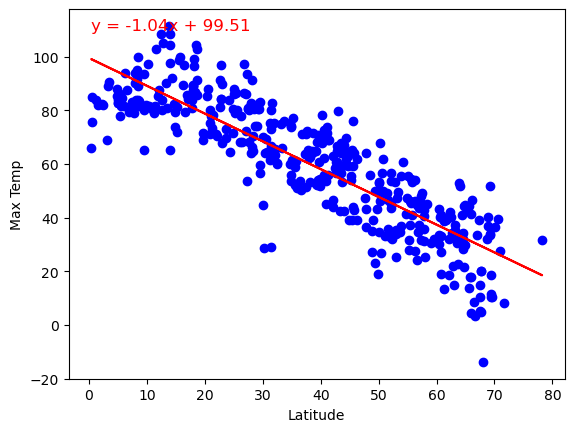

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-squared is: 0.8290276237026111


Text(0, 0.5, 'Max Temp')

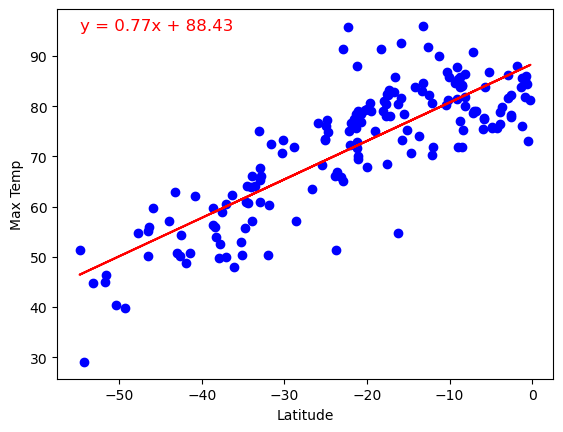

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** There is a correlation between maximum temperatures and latitude. As latitude increases and decreases away from the equator, the meximum temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.30778955358063403


Text(0, 0.5, 'Humidity')

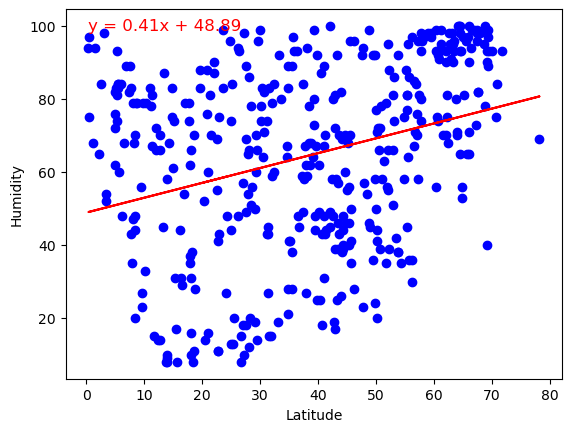

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-squared is: 0.15689738391767


Text(0, 0.5, 'Humidity')

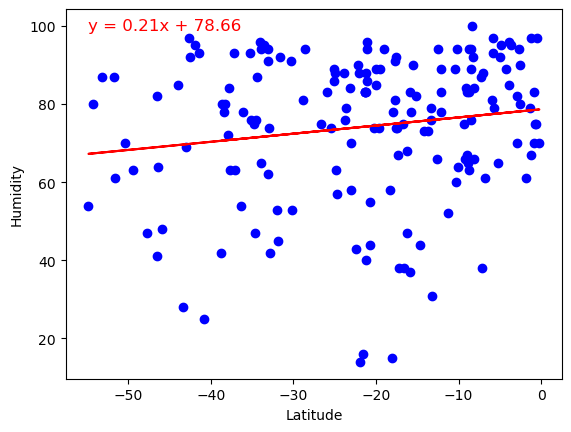

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** There is not a statistically significant correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.12564196174940329


Text(0, 0.5, 'Cloudiness')

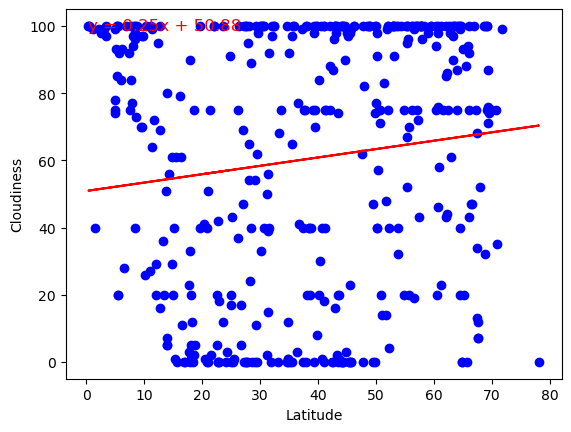

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-squared is: 0.03238316732737751


Text(0, 0.5, 'Cloudiness')

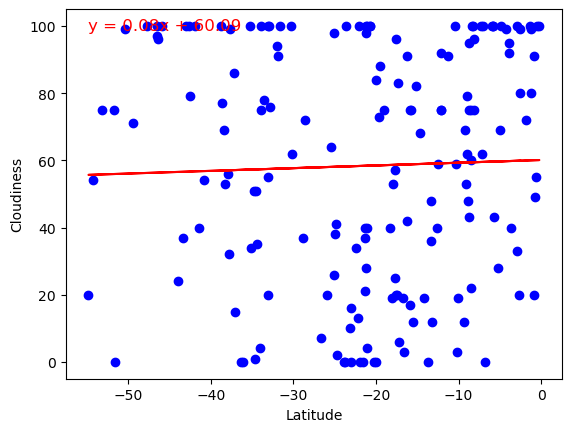

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** There is not a statistically significant correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.025217143039034554


Text(0, 0.5, 'Wind Speed')

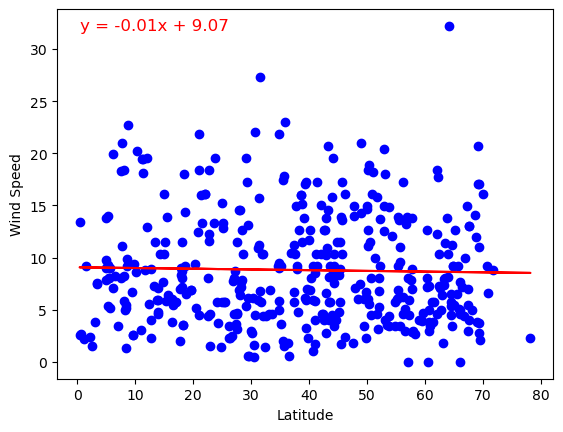

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-squared is: -0.28119408346957103


Text(0, 0.5, 'Wind Speed')

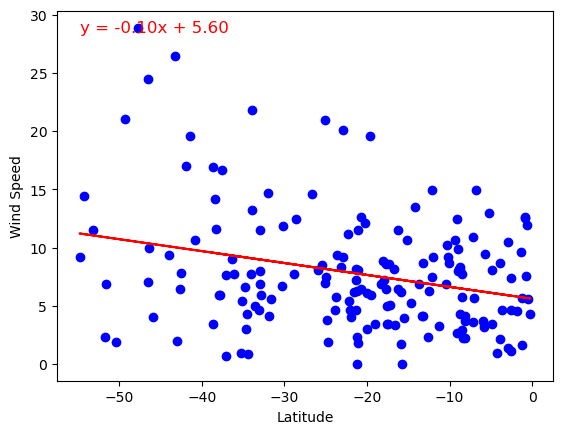

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** There is not a statistically significant correlation between latitude and wind speed.